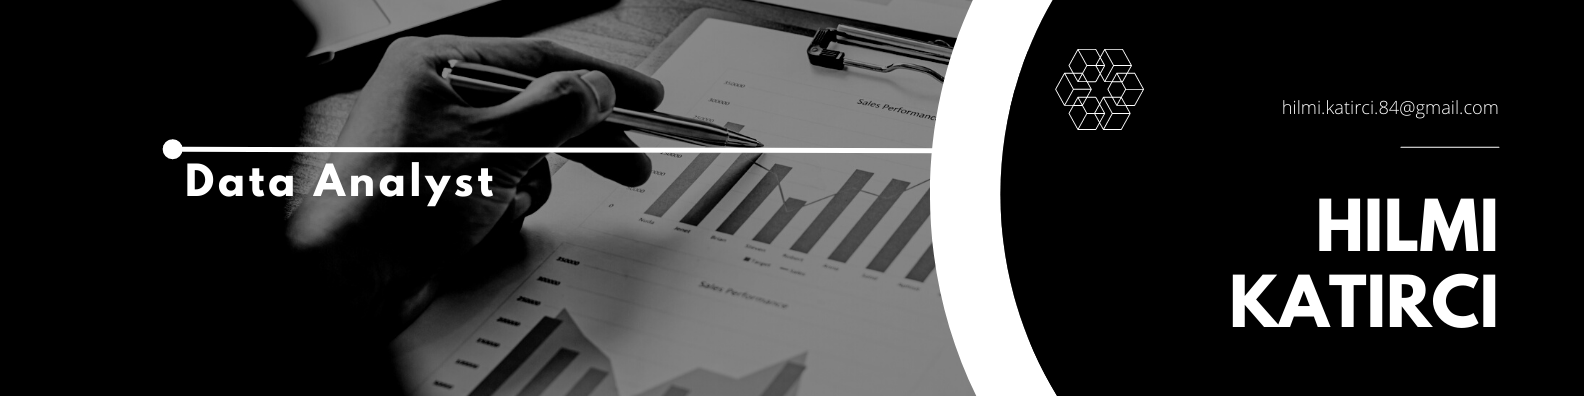

<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>Malaria Data<br><h1>


# Dataset Info

The dataset contains 2 folders - 'parasitized', 'uninfected'

And a total of 27,558 images.

This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

# Import Libraries and Export Images from Zip_File

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/cell_images.zip", "r")
zip_ref.extractall()
zip_ref.close()

# Recognizing and Understanding Data

In [5]:
my_data_dir = "cell_images"

In [6]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['test', 'train']

In [7]:
test_path = os.path.join(my_data_dir, 'test')
train_path = os.path.join(my_data_dir, 'train')

In [8]:
test_path 

'cell_images/test'

In [9]:
os.listdir(test_path)

['uninfected', 'parasitized']

In [10]:
os.listdir(train_path)

['uninfected', 'parasitized']

In [11]:
classes = os.listdir(train_path)
classes

['uninfected', 'parasitized']

In [12]:
import pathlib

data_dir = pathlib.Path(train_path)  # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
# created a list of class_names from the subdirectories
print(class_names)

['parasitized' 'uninfected']


In [13]:
class_names

array(['parasitized', 'uninfected'], dtype='<U11')

**Let's check how many images there are.**

In [14]:
os.listdir(os.path.join(train_path, 'parasitized'))[:5]

['C39P4thinF_original_IMG_20150622_105803_cell_90.png',
 'C84P45ThinF_IMG_20150818_102800_cell_11.png',
 'C173P134NThinF_IMG_20151130_120046_cell_243.png',
 'C117P78ThinF_IMG_20150930_220616_cell_95.png',
 'C80P41ThinF_IMG_20150817_111802_cell_3.png']

In [15]:
len(os.listdir(os.path.join(train_path, 'parasitized'))), len(os.listdir(os.path.join(train_path, 'uninfected')))

(12479, 12479)

In [16]:
len(os.listdir(os.path.join(test_path, 'parasitized'))), len(os.listdir(os.path.join(test_path, 'uninfected')))

(1300, 1300)

In [17]:
# Walk through cell_images directory and list number of files
for dirpath, dirnames, filenames in os.walk(my_data_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'cell_images'.
There are 2 directories and 0 images in 'cell_images/test'.
There are 0 directories and 1300 images in 'cell_images/test/uninfected'.
There are 0 directories and 1300 images in 'cell_images/test/parasitized'.
There are 2 directories and 0 images in 'cell_images/train'.
There are 0 directories and 12479 images in 'cell_images/train/uninfected'.
There are 0 directories and 12479 images in 'cell_images/train/parasitized'.


**Let's take an example images from both train-parasitized and train-uninfected folders to observe process** 

In [18]:
os.listdir(os.path.join(train_path, 'parasitized'))[:10]

['C39P4thinF_original_IMG_20150622_105803_cell_90.png',
 'C84P45ThinF_IMG_20150818_102800_cell_11.png',
 'C173P134NThinF_IMG_20151130_120046_cell_243.png',
 'C117P78ThinF_IMG_20150930_220616_cell_95.png',
 'C80P41ThinF_IMG_20150817_111802_cell_3.png',
 'C120P81ThinF_IMG_20151002_131120_cell_189.png',
 'C182P143NThinF_IMG_20151201_172842_cell_18.png',
 'C116P77ThinF_IMG_20150930_171844_cell_87.png',
 'C82P43ThinF_IMG_20150817_125326_cell_18.png',
 'C99P60ThinF_IMG_20150918_141129_cell_127.png']

In [19]:
os.listdir(os.path.join(train_path, 'parasitized'))[5]

'C120P81ThinF_IMG_20151002_131120_cell_189.png'

In [20]:
para_cell_path = os.path.join(train_path, 'parasitized', os.listdir(os.path.join(train_path, 'parasitized'))[5])

In [21]:
para_cell_path

'cell_images/train/parasitized/C120P81ThinF_IMG_20151002_131120_cell_189.png'

In [22]:
imread(para_cell_path)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [23]:
para_cell = imread(para_cell_path)

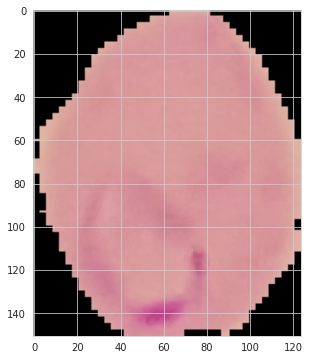

In [24]:
plt.imshow(para_cell);

In [25]:
para_cell.shape

(151, 124, 3)

In [26]:
os.listdir(os.path.join(train_path, 'uninfected'))[:10]

['C165P126ThinF_IMG_20151117_171006_cell_84.png',
 'C168P129ThinF_IMG_20151118_154126_cell_147.png',
 'C203ThinF_IMG_20151029_110105_cell_61.png',
 'C132P93ThinF_IMG_20151004_151733_cell_115.png',
 'C147P108ThinF_IMG_20151115_101317_cell_177.png',
 'C73P34_ThinF_IMG_20150815_111422_cell_63.png',
 'C4thin_original_IMG_20150608_170038_cell_95.png',
 'C118P79ThinF_IMG_20151002_110834_cell_10.png',
 'C136P97ThinF_IMG_20151005_140646_cell_52.png',
 'C163P124ThinF_IMG_20151116_111925_cell_51.png']

In [27]:
uninfected_cell_path = os.path.join(train_path, 'uninfected/', os.listdir(os.path.join(train_path, 'uninfected'))[5])

In [28]:
imread(uninfected_cell_path)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

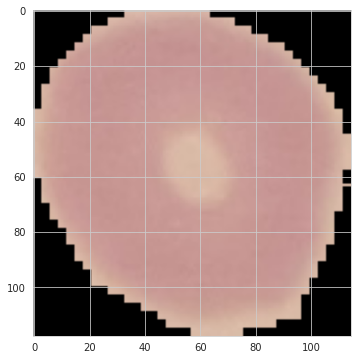

In [29]:
# plt.imshow(imread(uninfected_cell_path));
uninfected_cell = imread(uninfected_cell_path)
plt.imshow(uninfected_cell);

In [30]:
uninfected_cell.shape

(118, 115, 3)

In [31]:
# View a random image
import random


def view_random_image(target_dir, target_class):
    """Returns a randomly selected image after displaying it,
    given directory path and class names.
    Args:
        target_dir (str): Relative path to the target directory
        target_class (str): The name of the target class to randomly select a picture from
    Returns:
        img (np.ndarray): Randomly selected image as np.ndarray
    """
    # Setup target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}")  # show the shape of the image

    return img

Image shape: (109, 121, 3)


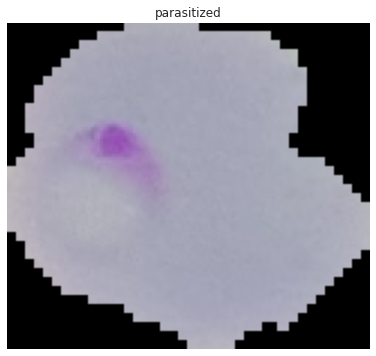

In [32]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="parasitized")

Image shape: (160, 238, 3)


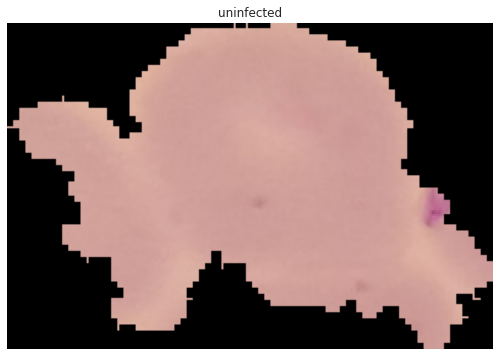

In [33]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="uninfected")

Image shape: (124, 121, 3)


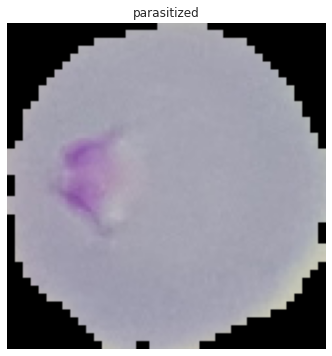

In [34]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_path,
                        target_class=random.choice(class_names))  # get a random class name

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [35]:
uninfected_cell.shape

(118, 115, 3)

In [36]:
para_cell.shape

(151, 124, 3)

```python
x = []
y = []

for image in os.listdir(train_path+'uninfected'):
    img = imread(train_path+'uninfected/'+image)
    d1,d2,_ = img.shape
    x.append(d1)
    y.append(d2)
```

In [37]:
x = [imread(os.path.join(train_path, 'uninfected', image)).shape[0]
     for image in os.listdir(os.path.join(train_path, 'uninfected'))
     if 'Thumbs.db' not in image]
y = [imread(os.path.join(train_path, 'uninfected', image)).shape[1]
     for image in os.listdir(os.path.join(train_path, 'uninfected'))
     if 'Thumbs.db' not in image]

In [38]:
x[:5]

[133, 148, 151, 127, 121]

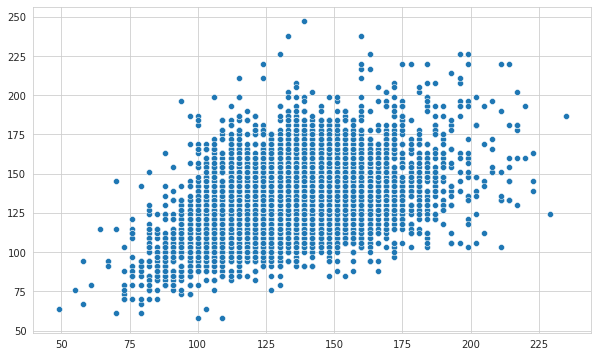

In [39]:
sns.scatterplot(x=x, y=y);

In [40]:
np.mean(x), np.median(x)

(131.64820899110507, 130.0)

In [41]:
np.mean(y), np.median(y)

(131.4041990544114, 130.0)

In [42]:
image_shape = (130, 130, 3)

## Scaling

**Let's check the images if they are needed to be scaled or not**

In [43]:
uninfected_cell.max()

0.8745098

In [44]:
para_cell.max()

0.9019608

As we see above, all images have already been scaled

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
# help(ImageDataGenerator)

In [47]:
image_gen = ImageDataGenerator(rotation_range=15,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               # rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [48]:
val_image_gen = ImageDataGenerator()

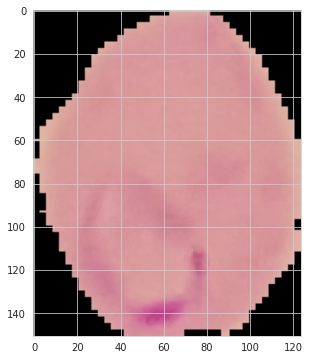

In [49]:
plt.imshow(para_cell);

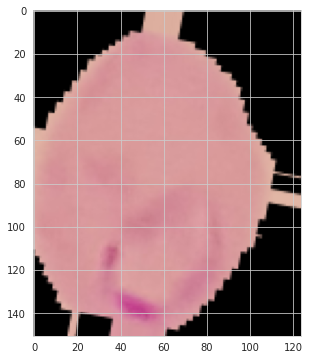

In [50]:
plt.imshow(image_gen.random_transform(para_cell));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [51]:
# help(image_gen.flow_from_directory)
# Takes the path to a directory & generates batches of augmented data.

In [52]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [53]:
val_image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [54]:
batch_size = 32

In [55]:
image_shape

(130, 130, 3)

In [56]:
train_image_gen = image_gen.flow_from_directory(directory=train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)

Found 24958 images belonging to 2 classes.


In [57]:
test_image_gen = val_image_gen.flow_from_directory(directory=test_path,
                                                   target_size=image_shape[:2],
                                                   color_mode='rgb',
                                                   batch_size=batch_size,
                                                   class_mode='binary',
                                                   shuffle=False)

Found 2600 images belonging to 2 classes.


In [58]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [59]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [60]:
train_image_gen

In [61]:
train_image_gen[0][0].shape

(32, 130, 130, 3)

In [62]:
train_image_gen[0][0][0].shape

(130, 130, 3)

In [63]:
len(train_image_gen), len(test_image_gen)

(780, 82)

In [64]:
len(train_image_gen) * batch_size, len(test_image_gen) * batch_size

(24960, 2624)

In [65]:
# Get a sample of the training data batch
images, labels = train_image_gen.next()  # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [66]:
# Get a sample of the testing data batch
images, labels = test_image_gen.next()  # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling-1

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Flatten())


model1.add(Dense(128))
model1.add(Activation('relu'))

model1.add(Dropout(0.5))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

# optimizer = keras.optimizers.Adam(lr=0.01)
model1.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [69]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [70]:
early_stop = EarlyStopping(monitor='val_loss',mode="min",patience=2, restore_best_weights=True)

In [71]:
model1.fit(train_image_gen,
           epochs=10,
           steps_per_epoch=len(train_image_gen),
           validation_data=test_image_gen,
           validation_steps=len(test_image_gen),
           callbacks=[early_stop])

Epoch 1/10
780/780 [==============================] - 125s 149ms/step - loss: 1.2897 - accuracy: 0.5444 - val_loss: 0.6876 - val_accuracy: 0.5419
Epoch 2/10
780/780 [==============================] - 113s 144ms/step - loss: 0.6806 - accuracy: 0.5736 - val_loss: 0.7005 - val_accuracy: 0.5508
Epoch 3/10
780/780 [==============================] - 112s 143ms/step - loss: 0.6725 - accuracy: 0.5908 - val_loss: 0.6975 - val_accuracy: 0.5954


In [72]:
model1.metrics_names

['loss', 'accuracy']

In [73]:
summary = pd.DataFrame(model1.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.290,0.544,0.688,0.542
1,0.681,0.574,0.700,0.551
2,0.672,0.591,0.697,0.595


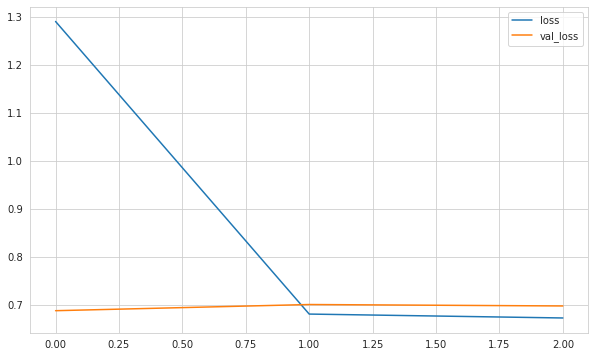

In [74]:
summary[["loss", "val_loss"]].plot();

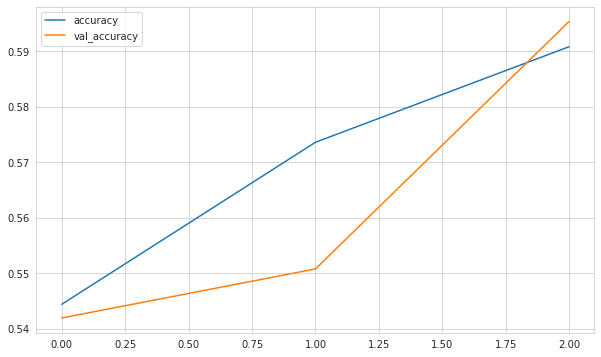

In [75]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
score = model1.evaluate(test_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

82/82 [==============================] - 3s 35ms/step - loss: 0.6876 - accuracy: 0.5419
Test loss: 0.6876351833343506
Test accuracy: 0.5419231057167053


In [78]:
pred_prob = model1.predict(test_image_gen)

82/82 [==============================] - 3s 34ms/step


In [79]:
pred_prob

array([[0.4595805 ],
       [0.37518707],
       [0.5052395 ],
       ...,
       [0.5462169 ],
       [0.6013566 ],
       [0.6699648 ]], dtype=float32)

In [80]:
y_pred = pred_prob > 0.5

In [81]:
y_pred

array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [82]:
y_test = test_image_gen.classes
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.27      0.37      1300
           1       0.53      0.82      0.64      1300

    accuracy                           0.54      2600
   macro avg       0.56      0.54      0.50      2600
weighted avg       0.56      0.54      0.50      2600



In [84]:
confusion_matrix(y_test, y_pred)

array([[ 348,  952],
       [ 239, 1061]])

# Modelling-2

In [85]:
model2 = Sequential()

model2.add(Conv2D(filters=64,
                  kernel_size=(3, 3),
                  input_shape=image_shape,
                  padding='same',
                  activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu'))
model2.add(Conv2D(filters=128,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=256,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu'))
model2.add(Conv2D(filters=256,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu'))
model2.add(Conv2D(filters=256,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3, 3),
                  padding='same',
                  activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64,
                  kernel_size=(3, 3),
                  padding='same',
                  activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Flatten())


model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [86]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 130, 130, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 65, 65, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 65, 65, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 65, 65, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 256)      

In [87]:
early_stop = EarlyStopping(monitor='val_loss', mode="min",patience=4, restore_best_weights=True)

In [88]:
model2.fit(train_image_gen,
           epochs=15,
           steps_per_epoch=len(train_image_gen),
           validation_data=test_image_gen,
           validation_steps=len(test_image_gen),
           callbacks=[early_stop])

Epoch 1/15
780/780 [==============================] - 136s 171ms/step - loss: 0.7006 - accuracy: 0.5489 - val_loss: 0.6886 - val_accuracy: 0.5269
Epoch 2/15
780/780 [==============================] - 127s 163ms/step - loss: 0.3024 - accuracy: 0.8762 - val_loss: 0.1611 - val_accuracy: 0.9485
Epoch 3/15
780/780 [==============================] - 128s 165ms/step - loss: 0.1675 - accuracy: 0.9487 - val_loss: 0.1606 - val_accuracy: 0.9477
Epoch 4/15
780/780 [==============================] - 129s 165ms/step - loss: 0.1579 - accuracy: 0.9512 - val_loss: 0.1588 - val_accuracy: 0.9523
Epoch 5/15
780/780 [==============================] - 129s 165ms/step - loss: 0.1564 - accuracy: 0.9529 - val_loss: 0.1693 - val_accuracy: 0.9546
Epoch 6/15
780/780 [==============================] - 129s 165ms/step - loss: 0.1510 - accuracy: 0.9536 - val_loss: 0.1433 - val_accuracy: 0.9531
Epoch 7/15
780/780 [==============================] - 127s 163ms/step - loss: 0.1485 - accuracy: 0.9538 - val_loss: 0.1585 -

In [89]:
model2.metrics_names

['loss', 'accuracy']

In [90]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.701,0.549,0.689,0.527
1,0.302,0.876,0.161,0.948
2,0.168,0.949,0.161,0.948
3,0.158,0.951,0.159,0.952
4,0.156,0.953,0.169,0.955


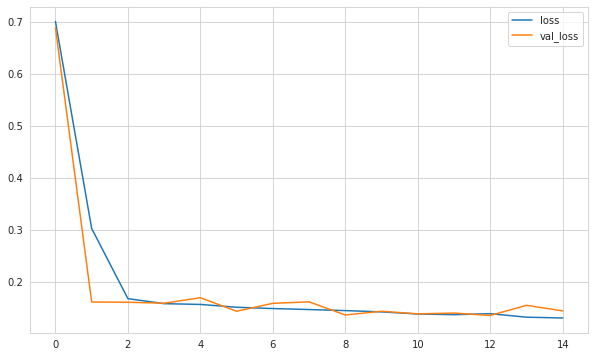

In [91]:
summary[["loss", "val_loss"]].plot()
plt.show()

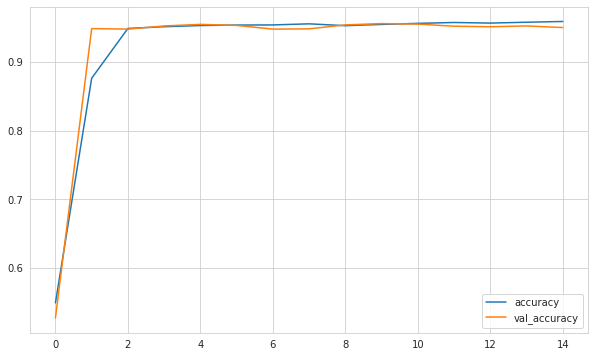

In [92]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

# Evaluation on Test Data

In [93]:
score = model2.evaluate(test_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

82/82 [==============================] - 4s 45ms/step - loss: 0.1440 - accuracy: 0.9500
Test loss: 0.14403526484966278
Test accuracy: 0.949999988079071


In [94]:
pred_prob = model2.predict(test_image_gen)

82/82 [==============================] - 4s 43ms/step


In [95]:
y_pred = pred_prob > 0.5

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1300
           1       0.92      0.98      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [97]:
confusion_matrix(y_test, y_pred)

array([[1193,  107],
       [  23, 1277]])

In [98]:
model1.save('malaria_model.h5')

# Prediction

In [99]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [100]:
model = load_model('malaria_model.h5')

In [101]:
target_class = random.choice(class_names)
target_class

'uninfected'

In [102]:
random_image = random.sample(
    os.listdir(os.path.join(test_path, target_class)),
    1)
random_image

['C118P79ThinF_IMG_20151002_105018_cell_59.png']

In [103]:
image_path = os.path.join(test_path, target_class, random_image[0])
image_path

'cell_images/test/uninfected/C118P79ThinF_IMG_20151002_105018_cell_59.png'

In [104]:
my_image = image.load_img(image_path, target_size=image_shape)

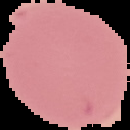

In [105]:
my_image

In [106]:
type(my_image)

PIL.Image.Image

In [107]:
# my_image = np.array(my_image)
my_image = image.img_to_array(my_image)

In [108]:
my_image.shape

(130, 130, 3)

In [109]:
my_image = np.expand_dims(my_image, axis=0)

In [110]:
my_image.shape

(1, 130, 130, 3)

In [111]:
model.predict(my_image)

1/1 [==============================] - 0s 126ms/step


array([[0.5069662]], dtype=float32)

In [112]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [113]:
def pred_and_plot(model, img_size):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    target_class = random.choice(class_names)
    random_image = random.sample(
        os.listdir(os.path.join(test_path, target_class)),
        1)
    img_path = os.path.join(test_path, target_class, random_image[0])
    img = image.load_img(img_path, target_size=img_size)
    img = np.array(img)

    # Make a prediction
    pred = model.predict(np.expand_dims(img, axis=0))
    print("prediction_probability: ", pred.max())

    # Get the predicted class
    if len(pred[0]) > 1:  # check for multi-class
        pred_class = class_names[pred.argmax()]  # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])]  # if only one output, round

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 72ms/step
prediction_probability:  0.6068056


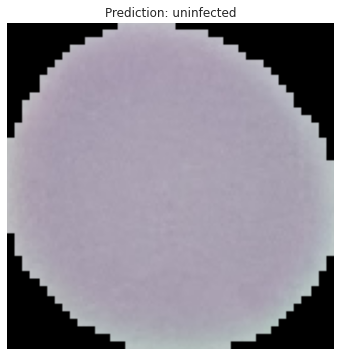

In [114]:
pred_and_plot(model, (130, 130))

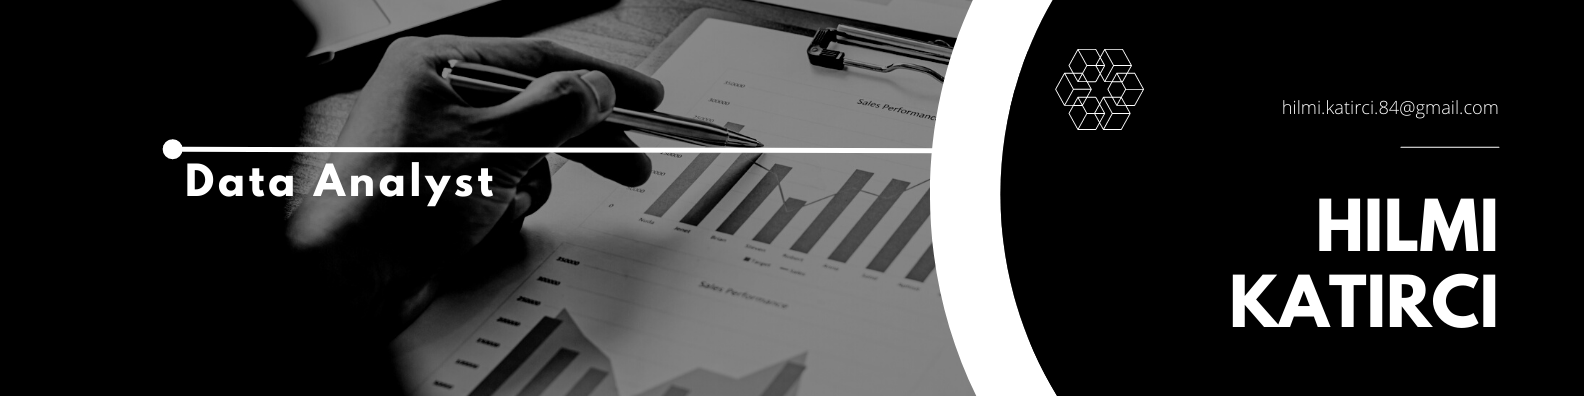